# Homework 2 - How do Taxis move in NYC?

## Imported libraries

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

import matplotlib.pyplot as plt

import our_functions as of

import datetime

At the beginning of your analysis, decide and clearly state what borough you consider for running the analysis: the borough of departure or the arrival one.


# We chose the borough of departure

# Exploratory Data Analysis

## 1. [RQ1] In what period of the year Taxis are used more? 

In [5]:
df_names=['yellow_tripdata_2018-01.csv','yellow_tripdata_2018-02.csv',
          'yellow_tripdata_2018-03.csv','yellow_tripdata_2018-04.csv',
         'yellow_tripdata_2018-05.csv','yellow_tripdata_2018-06.csv']
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

##### just for Dusica's sad computer--> random sampling of 1mil rows for each .csv file (AKA each month) 

n = 8759874 #number of records in file
s = 1000000 #desired sample size
skip = sorted(random.sample(range(n),n-s))

if 0 in skip:
    skip.remove(0)
    
for i in df_names:
    yellow_tripdata=pd.read_csv('data/'+str(i),skiprows=skip)
    yellow_tripdata.to_csv(str(i))

In [6]:
list_DataFrames=[]

In [4]:
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv',usecols=['Borough','LocationID'])
for i in df_names:
    list_DataFrames.append(
        pd.merge(pd.read_csv('data/'+str(i),usecols=['PULocationID','tpep_pickup_datetime'],parse_dates=['tpep_pickup_datetime'])
                 ,taxi_zone_lookup, how="left",left_on="PULocationID",right_on="LocationID"))

In [5]:
#all_data=pd.concat(list_DataFrames)

In [6]:
# Per esempio giugno
list_DataFrames[5].head()

,tpep_pickup_datetime,PULocationID,LocationID,Borough
0,2018-06-01 00:25:17,223,223,Queens
1,2018-06-01 00:39:42,141,141,Manhattan
2,2018-06-01 00:40:22,148,148,Manhattan
3,2018-06-01 00:26:26,114,114,Manhattan
4,2018-06-01 00:16:58,209,209,Manhattan


In [8]:
#irregular_years=merged.tpep_pickup_datetime[[merged.tpep_pickup_datetime[i].year!=2018 for i in range(len(merged['tpep_pickup_datetime']))]]

In [11]:
def plotEachMonthAverageDailuUsageOfTaxiCabs():
    for df in list_DataFrames:
        df['day'] = df["tpep_pickup_datetime"].apply(lambda df : df.day)
        average_number_of_rides=df.loc[:,['day','PULocationID']].groupby('day').count()
        average_number_of_rides.plot(subplots=True, figsize=(6, 6))

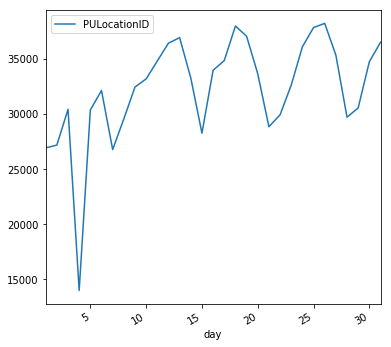

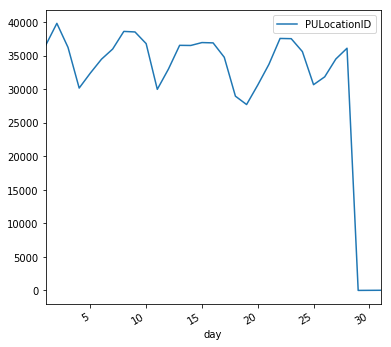

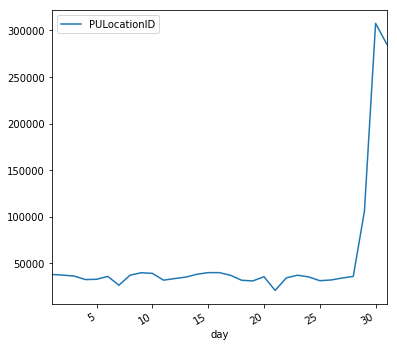

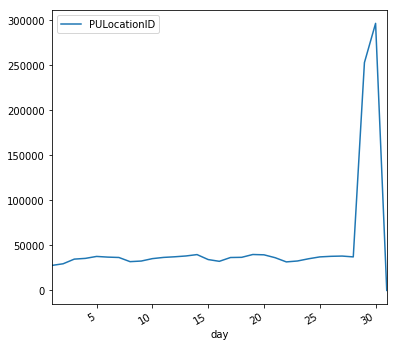

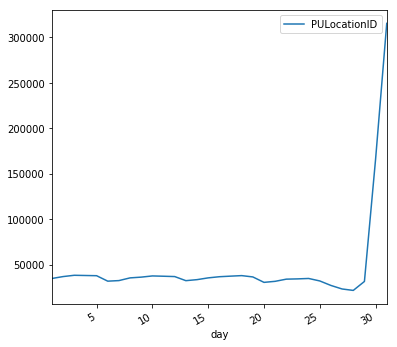

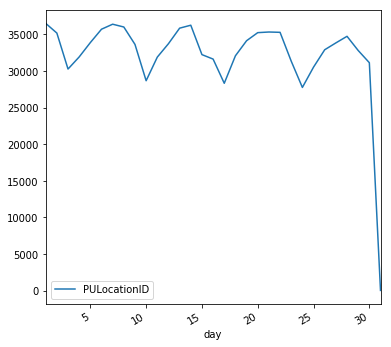

In [12]:
plotEachMonthAverageDailuUsageOfTaxiCabs()

In [18]:
# USABLE? I think we should put it all in one plot !!
# Plotting daily cab usage for each month separately
def DailyCabUsage():
    plt.figure()
    months=['January','February','March','April','May','June']
    
    all_data=pd.DataFrame()
    list_data=[]
    for i,df in enumerate (list_DataFrames):
            num_of_days=list_DataFrames[i].iloc[-1]['tpep_pickup_datetime'].day  #last day in the month == number of days in a month

            df['day'] = df["tpep_pickup_datetime"].apply(lambda df : df.day)
            avg_number_of_rides=df.loc[:,['day','PULocationID']].groupby('day').count()
            list_data.append(avg_number_of_rides)
            avg_number_of_rides.plot(color='r',title=months[i],legend=False)

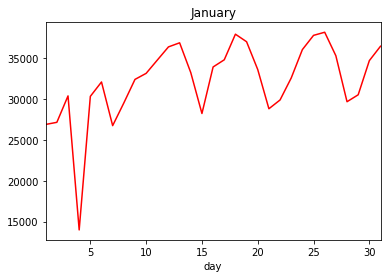

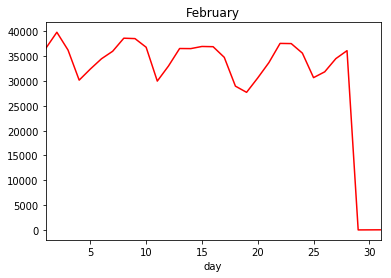

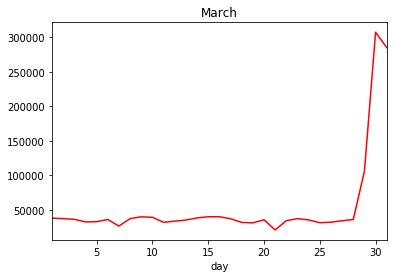

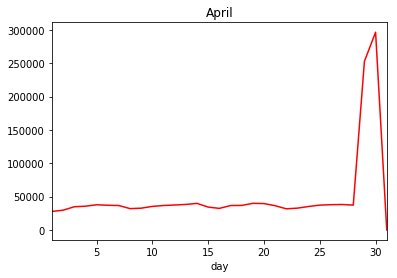

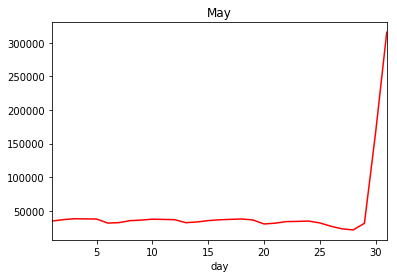

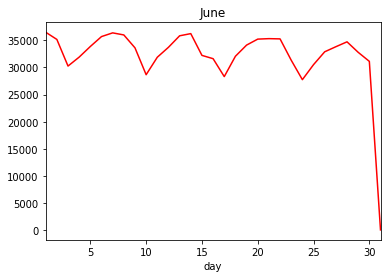

In [19]:
DailyCabUsage()

#irrelevant-> just trying out something


all_data=pd.DataFrame()
list_data=[]
months=['January','February','March','April','May','June']

for i,df in enumerate (list_DataFrames):
        df['day'] = df["tpep_pickup_datetime"].apply(lambda df : df.day)
        avg_number_of_rides=df.loc[:,['day','PULocationID']].groupby('day').count()
        #df.rename(columns={'PULocationID':months[i]},inplace=True)
        list_data.append(avg_number_of_rides)
        #ax = list_DataFrames[0].plot()

        #list_DataFrames[1].plot(ax=ax)
      #  avg_number_of_rides.plot(color='r')
all_data=list_data[0]   
m=pd.concat(list_data,axis=1,ignore_index=True)__??

#irrelevant-> just trying out something

ax = list_DataFrames[0].plot()

list_DataFrames[1].plot(ax=ax)

In [7]:
def plotEachMonthAverageDailyUsageOfTaxiCabs():
    average_num_for_all_months=pd.DataFrame()
    list_data=[]
    for df in list_DataFrames:
        num_of_days=df.iloc[-1]['tpep_pickup_datetime'].day
        average_number_of_rides=df.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days 
        list_data.append(average_number_of_rides)
    average_num_for_all_months=average_num_for_all_months.append(list_data)
    #average_num_for_all_months=pd.concat(list_data)
    return average_num_for_all_months

In [8]:
plotEachMonthAverageDailyUsageOfTaxiCabs()

IndexError: list index out of range

In [ ]:
def plotEachMonthAverageDailyUsageOfTaxiCabs():
    average_num_for_all_months=pd.DataFrame() # new DataFrame which will contain data for plotting
    list_data=[] #
    for i in range(len(list_DataFrames)):
        num_of_days=list_DataFrames[i].iloc[-1]['tpep_pickup_datetime'].day  #last day in the month == number of days in a month
        average_number_of_rides=list_DataFrames[i].loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days 
        average_number_of_rides['month']=i+1
        list_data.append(average_number_of_rides)
    average_num_for_all_months=average_num_for_all_months.append(list_data)
    #average_num_for_all_months=pd.concat(list_data)
   
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    ax = sns.barplot(y="PULocationID", x=average_num_for_all_months.index, data=average_num_for_all_months
                     ,hue='month')
    return ax
    #return average_num_for_all_months

In [ ]:
plotEachMonthAverageDailyUsageOfTaxiCabs()

In [ ]:
#all_data=pd.concat(list_DataFrames)

In [ ]:
merged['duration'] = merged['tpep_dropoff_datetime'] - merged['tpep_pickup_datetime']

Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

In [7]:
# for NYC

In [2]:
def fetch_data(cols,parse_cols):
    list_DataFrames=[]
    df_names=['yellow_tripdata_2018-01.csv','yellow_tripdata_2018-02.csv',
          'yellow_tripdata_2018-03.csv','yellow_tripdata_2018-04.csv',
         'yellow_tripdata_2018-05.csv','yellow_tripdata_2018-06.csv']
    taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv',usecols=['Borough','LocationID'])
    for i in df_names:
        list_DataFrames.append(pd.merge(pd.read_csv('data/'+str(i),usecols=cols,parse_dates=parse_cols)
                     ,taxi_zone_lookup, how="left",left_on="PULocationID",right_on="LocationID"))
    return list_DataFrames

In [3]:
cols=['PULocationID','tpep_dropoff_datetime','tpep_pickup_datetime']
parse_cols=['tpep_dropoff_datetime','tpep_pickup_datetime']
list_DataFrames=fetch_data(cols,parse_cols)

In [4]:
'duration_'+str(months[0])

NameError: name 'months' is not defined

In [16]:
list_DataFrames[1].loc[:,'duration_'+str(months[1])]

0        00:07:58
1        00:15:02
2        00:03:50
3        00:08:14
4        00:23:45
5        00:17:29
6        00:07:40
7        00:19:51
8        00:03:11
9        00:09:54
10       00:10:03
11       00:21:04
12       00:25:49
13       00:04:06
14       00:14:17
15       00:07:01
16       00:11:15
17       00:15:23
18       00:04:33
19       00:17:49
20       00:17:39
21       00:16:42
22       00:31:43
23       00:09:35
24       00:27:15
25       00:04:23
26       00:23:08
27       00:15:36
28       00:10:09
29       00:03:59
           ...   
969391   00:08:03
969392   00:07:39
969393   00:27:15
969394   00:05:03
969395   00:14:22
969396   00:04:27
969397   00:02:20
969398   00:13:34
969399   00:33:36
969400   00:06:13
969401   00:06:42
969402   00:02:24
969403   00:08:24
969404   00:07:05
969405   00:06:31
969406   00:10:40
969407   00:05:17
969408   00:14:53
969409   00:11:23
969410   00:15:53
969411   00:04:14
969412   00:12:56
969413   00:09:52
969414   00:20:02
969415   0

In [4]:
all_durs=pd.DataFrame()
list_data=[]
months=['January','February','March','April','May','June']

pd.concat([pd.DataFrame([i], columns=['tpep_dropoff_datetime','tpep_pickup_datetime']) for i in range(len(list_DataFrames))],
           ignore_index=True)

ValueError: Shape of passed values is (1, 1), indices imply (2, 1)

In [24]:
all_durs=pd.DataFrame()
list_data=[]
months=['January','February','March','April','May','June']

#pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],
#           ignore_index=True)

for i,df in enumerate (list_DataFrames):
    #df['duration_'+months[i]] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    list_data.append(pd.Series(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']))
        
all_durs['duration']=pd.Series(list_data)

In [22]:
len(durations)

1000001

In [17]:
list_data

[0         00:05:46
 1         00:24:39
 2         00:04:13
 3         00:05:56
 4         00:03:32
 5         00:13:22
 6         00:28:28
 7         00:01:23
 8         00:20:22
 9         00:15:34
 10        00:09:14
 11        00:06:16
 12        00:01:32
 13        00:10:31
 14        00:08:34
 15        00:05:56
 16        00:17:23
 17        00:10:32
 18        00:27:09
 19        00:26:25
 20        00:20:09
 21        00:12:44
 22        00:07:57
 23        00:23:05
 24        00:01:56
 25        00:08:09
 26        00:03:49
 27        00:11:20
 28        00:13:34
 29        00:10:52
             ...   
 999971    00:10:51
 999972    00:00:21
 999973    00:18:27
 999974    00:17:06
 999975    00:09:16
 999976    00:18:56
 999977    00:09:31
 999978    00:06:11
 999979    00:10:58
 999980    00:35:36
 999981    00:09:45
 999982    00:17:02
 999983    00:09:25
 999984    00:12:04
 999985    00:14:01
 999986    00:11:16
 999987    00:04:27
 999988    00:30:28
 999989    00:22:50


In [16]:
len(list_data)

6

In [9]:
all_durs

,0,1,2,3,4,5,6,7,8,9,...,1670493,1670494,1670495,1670496,1670497,1670498,1670499,1670500,1670501,1670502
duration_January,00:05:46,00:24:39,00:04:13,00:05:56,00:03:32,00:13:22,00:28:28,00:01:23,00:20:22,00:15:34,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
duration_February,00:07:58,00:15:02,00:03:50,00:08:14,00:23:45,00:17:29,00:07:40,00:19:51,00:03:11,00:09:54,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
duration_March,00:11:55,00:14:07,00:11:57,00:24:50,00:10:33,00:03:19,00:12:36,00:20:35,00:12:04,00:09:00,...,00:01:20,00:15:15,00:20:34,00:30:36,00:04:24,00:20:30,00:10:32,00:14:31,00:12:54,00:19:42
duration_April,00:03:22,00:05:56,00:16:02,00:06:10,00:22:21,00:13:21,00:09:02,00:16:37,00:08:04,00:02:39,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
duration_May,00:29:36,00:04:54,00:10:09,02:03:19,00:02:12,00:14:10,00:21:21,00:04:45,00:20:19,00:03:46,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
duration_June,00:22:07,00:17:41,00:11:58,00:00:00,00:13:06,00:27:42,00:26:14,00:03:09,00:04:39,00:12:56,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


MemoryError: 

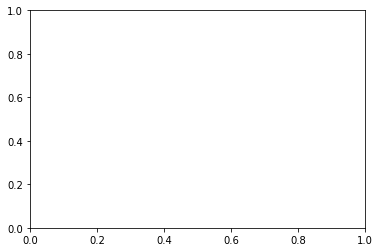

In [6]:
ax = sns.distplot(all_durs, kde=False, rug=True)

In [29]:
all_durs

""


C:\Users\Dusica\Anaconda3\lib\site-packages\seaborn\distributions.py:191: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Dusica\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

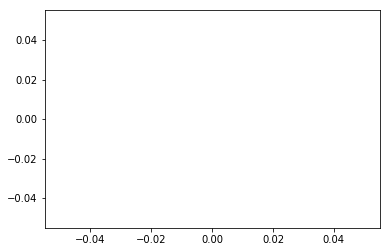

In [28]:
ax = sns.distplot(all_durs, kde=False, rug=True)

In [ ]:
# for each borough 

## 3. [RQ3] Do the all trips last the same? 

# NYC

In [ ]:
def DurationOfTrips():
    all_durs=pd.DataFrame()
    list_data=[]
    for i,df enumerate (list_DataFrames):
        num_of_days=df.iloc[-1]['tpep_pickup_datetime'].day
        average_number_of_rides=df.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days 
        average_number_of_rides['month']=i+1
        list_data.append(average_number_of_rides)
        merged['duration'] = merged['tpep_dropoff_datetime'] - merged['tpep_pickup_datetime']
    average_num_for_all_months=average_num_for_all_months.append(list_data)
    #average_num_for_all_months=pd.concat(list_data)
   
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    ax = sns.barplot(y="PULocationID", x=average_num_for_all_months.index, data=average_num_for_all_months
                     ,hue='month')
    return ax
    #return average_num_for_all_months

# For each borough

# Just for January

In [ ]:
yellow_tripdata_january=pd.read_csv('data/yellow_tripdata_2018-01.csv',usecols=['PULocationID','tpep_pickup_datetime'],
                                     parse_dates=['tpep_pickup_datetime'])

merged = pd.merge(yellow_tripdata_january,taxi_zone_lookup, how="left",left_on="PULocationID",right_on="LocationID")
#for numbers of day for each month 

In [ ]:
#merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])

Some values of dates aren't from the year they are supposed to be. Therefore, they should be removed from the dataset and exclude from the analysis. Even though it is small percentage of this large dataset, data should be cleaned by removing any incosistency and iregularity that is identified before starting with the analysis.

In [ ]:
irregular_years=merged.tpep_pickup_datetime[[merged.tpep_pickup_datetime[i].year!=2018 for i in range(len(merged['tpep_pickup_datetime']))]]

In [ ]:
len(irregular_years)

In [ ]:
irregular_years.head()

In [ ]:
merged.tpep_pickup_datetime.shape

In [ ]:
merged=merged[[merged.tpep_pickup_datetime[i].year==2018 for i in range(len(merged['tpep_pickup_datetime']))]]

In [ ]:
merged.tpep_pickup_datetime.shape

In [ ]:
np.unique(merged.Borough)

In [ ]:
num_of_days=merged.iloc[-1]['tpep_pickup_datetime'].day
average_number_of_rides=merged.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days

average_number_of_rides

In [ ]:
#What shall we do with this? :D
len(merged[merged.Borough=='Unknown'])

In [ ]:
average_number_of_rides.plot(kind='bar')

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="PULocationID", x=average_number_of_rides.index, data=average_number_of_rides)

In [ ]:
#below nothing useful 

In [ ]:
#merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])

In [ ]:
#merged.loc[:,['Borough','PULocationID','tpep_pickup_datetime']].groupby('Borough').count()

In [ ]:
#average # of rides per day in January 


In [ ]:
#merged.loc[:,['Borough','PULocationID','tpep_pickup_datetime']].groupby('Borough').count()/num_of_days

In [ ]:
#average_number_of_rides=merged.loc[:,['Borough','PULocationID']].groupby('Borough').count()/num_of_days

In [ ]:
#merged.drop_duplicates()

sns.set(style="whitegrid")
ax = sns.barplot(y="PULocationID", x=average_number_of_rides.index, data=average_number_of_rides,hue="Borough")

In [ ]:
merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])

In [ ]:
merged.Borough.sum()

In [ ]:
merged.count

In [ ]:
average_number_of_rides

In [ ]:
df_names=['yellow_tripdata_2018-01.csv']#,'yellow_tripdata_2018-02.csv',
        #  'yellow_tripdata_2018-03.csv','yellow_tripdata_2018-04.csv',
       #  'yellow_tripdata_2018-05.csv','yellow_tripdata_2018-06.csv']
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

In [ ]:
of.su(3,4)

In [ ]:
# loading yellow_tripdata
data_frames=[]

for i in df_names:
    data_frames.append(pd.read_csv('data/'+str(i),usecols=['PULocationID','tpep_pickup_datetime']))

In [ ]:
data_frames[0].shape

#data=pd.concat(data_frames)
merged = pd.merge(data,taxi_zone_lookup,
                      how="left",left_on="PULocationID",right_on="LocationID")

In [ ]:
gb = df.groupby('ZZ')    
[gb.get_group(x) for x in gb.groups]

In [ ]:
Avg # of trips per each day in January per each borough

In [ ]:
np.unique()

In [ ]:
# loading zone_lookup

csv_lst = ["yellow_tripdata_2018-01",
           "yellow_tripdata_2018-02",
           "yellow_tripdata_2018-03",
           "yellow_tripdata_2018-04",
           "yellow_tripdata_2018-05",
           "yellow_tripdata_2018-06"]


# for i in range (len(csv_list())):
    # ds = pd.read_csv(...)
    
    
    # dataframes = manage the data for the task :
        # clean data() -> filter wrong years, wrong month, NaN values
    
    # work
        
    
taxi_zone_lookup =pd.read_csv('taxi_zone_lookup.csv',sep=',')

## January 

In [ ]:
yellow_tripdata_january.head()

In [ ]:
# loading yellow_tripdata

yellow_tripdata_january=pd.read_csv('yellow_tripdata_2018-01.csv')


## Descriptive statistics

In [ ]:
# merging the two dataframes

merged = pd.merge(yellow_tripdata_january,taxi_zone_lookup,
                      how="left",left_on="PULocationID",right_on="LocationID")


# compute the duretion for each trip
merged['tpep_pickup_datetime']=pd.to_datetime(merged['tpep_pickup_datetime'])
merged['tpep_dropoff_datetime']=pd.to_datetime(merged['tpep_dropoff_datetime'])
merged['duration'] = merged['tpep_dropoff_datetime'] - merged['tpep_pickup_datetime']


merged.drop(['VendorID','DOLocationID','store_and_fwd_flag',
             'extra','mta_tax','tip_amount','tolls_amount',
             'tpep_dropoff_datetime'],axis=1,inplace=True)


In [ ]:
del yellow_tripdata_january

In [ ]:
#merged_jan['RatecodeID']=pd.Series(yellow_tripdata_january['RatecodeID'], dtype='object')

In [ ]:
yellow_tripdata_january.dtypes

In [ ]:
joined_tripdata_january.shape

In [ ]:
joined_tripdata_january.to_csv('farfalla.csv')